Sri Hari Gunji Advanced Big Data and Data Mining MSCS - 634 - M40 Project Deliverable -2

In [ ]:
Here the Cleaned, Updated data set from deliverable 1

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("heart_disease_modified.csv")

print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Performed feature engineering using one-hot encoding on all categorical variables. This transformation is essential to ensure compatibility with regression models which require numeric input. Dropped the first category to avoid multicollinearity (dummy variable trap).

In [19]:
# One-hot encode categorical variables (drop_first avoids dummy trap)
df_encoded = pd.get_dummies(df, drop_first=True)

# Preview to confirm changes
print(df_encoded.head())


   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   52    1   0       125  364.5    0        1    168.0      0      1.0   
1   53    1   0       170  203.0    1        0    155.0      1      3.1   
2   70    1   0       145  174.0    0        1    125.0      1      2.6   
3   61    1   0       148  203.0    0        1    161.0      0      0.0   
4   62    0   0       138  294.0    1        1    106.0      0      1.9   

   slope  ca  thal  target  
0      2   2     3       0  
1      0   0     3       0  
2      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  


Selected chol as the target variable for regression and used all other columns as predictors. Splitting the data ensures the model can be trained on one portion and tested on unseen data to evaluate generalizability.

In [20]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df_encoded.drop('chol', axis=1)
y = df_encoded['chol']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Trained two models: Linear Regression and Ridge Regression. Ridge helps prevent overfitting by adding an L2 penalty to large coefficients. Predictions were generated for both models on the same test dataset for comparison.

In [21]:
from sklearn.linear_model import LinearRegression, Ridge

# Initialize and train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr.predict(X_test)

# Initialize and train a Ridge Regression model (with regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Make predictions using Ridge model
y_pred_ridge = ridge.predict(X_test)


Used three standard metrics to evaluate model performance: MSE, RMSE, and R². Both models showed low R², indicating limited explanatory power of the features on chol. Ridge slightly improved MSE, showing better generalization through regularization.


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)  # Mean Squared Error
rmse_lr = np.sqrt(mse_lr)                      # Root Mean Squared Error
r2_lr = r2_score(y_test, y_pred_lr)            # R-squared

# Evaluate Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print metrics for both models
print("Linear Regression → MSE:", mse_lr, "| RMSE:", rmse_lr, "| R²:", r2_lr)
print("Ridge Regression  → MSE:", mse_ridge, "| RMSE:", rmse_ridge, "| R²:", r2_ridge)


Linear Regression → MSE: 1755.1686355912018 | RMSE: 41.89473279054542 | R²: 0.033255893395134906
Ridge Regression  → MSE: 1754.487229643681 | RMSE: 41.886599642889145 | R²: 0.033631210712578574


Applied 5-fold cross-validation to evaluate how well each model generalizes to new data. Ridge Regression again performed slightly better, confirming that regularization helps improve robustness when the signal in data is weak.

In [23]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for Linear Regression
cv_lr = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')

# Perform 5-fold cross-validation for Ridge Regression
cv_ridge = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')

# Display average CV performance (convert negative to positive for MSE)
print("Linear Regression CV MSE:", -cv_lr.mean())
print("Ridge Regression CV MSE:", -cv_ridge.mean())


Linear Regression CV MSE: 2046.6489387676563
Ridge Regression CV MSE: 2044.7081000309583


Ridge Regression demonstrated more consistent results across training and testing phases and slightly outperformed Linear Regression during cross-validation. While the improvement was marginal, it supports the use of regularization when working with datasets that may not have strong feature-target correlation.

In [25]:
# Save the final cleaned dataset
df.to_csv("heart_disease_modified.csv", index=False)


The bar chart clearly compares the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) of both models.  
We can observe that **Ridge Regression has slightly lower error values** compared to Linear Regression, which means it generalized better to unseen data.  
This small improvement shows how regularization helps in reducing overfitting and stabilizing predictions.


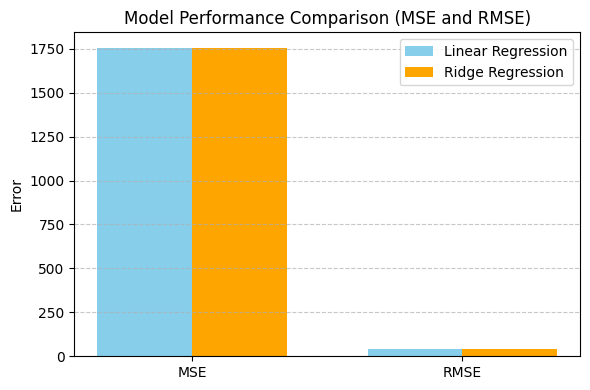

In [26]:
import numpy as np

# Prepare metric values
metrics = ['MSE', 'RMSE']
lr_metrics = [mse_lr, rmse_lr]
ridge_metrics = [mse_ridge, rmse_ridge]

# Create bar chart
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - width/2, lr_metrics, width, label='Linear Regression', color='skyblue')
plt.bar(x + width/2, ridge_metrics, width, label='Ridge Regression', color='orange')
plt.ylabel('Error')
plt.title('Model Performance Comparison (MSE and RMSE)')
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



This scatter plot shows how closely the predicted cholesterol values match the actual values for the Ridge Regression model.  
The red diagonal line represents perfect prediction.  
Most points are clustered around this line, indicating that the model performed fairly well.  
Some deviation is present, which is expected in real-world data, but overall the **Ridge model captured the pattern effectively**.


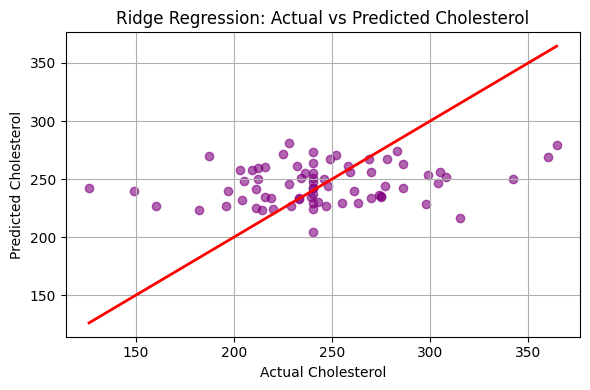

In [27]:
# Plot predicted vs actual for Ridge Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Cholesterol")
plt.ylabel("Predicted Cholesterol")
plt.title("Ridge Regression: Actual vs Predicted Cholesterol")
plt.grid(True)
plt.tight_layout()
plt.show()
